<a href="https://colab.research.google.com/github/Kagev/DataScience/blob/main/DS_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.


Завдання 2
Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

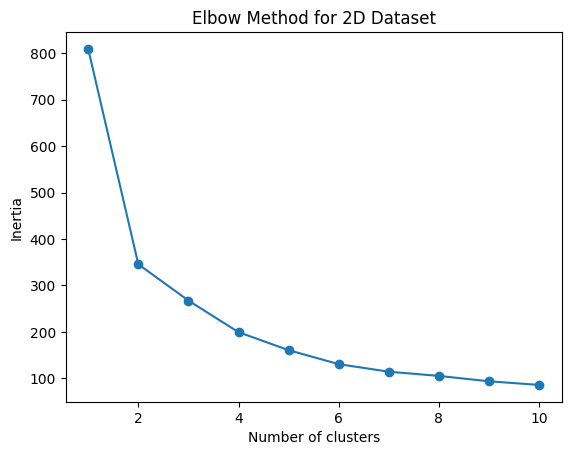

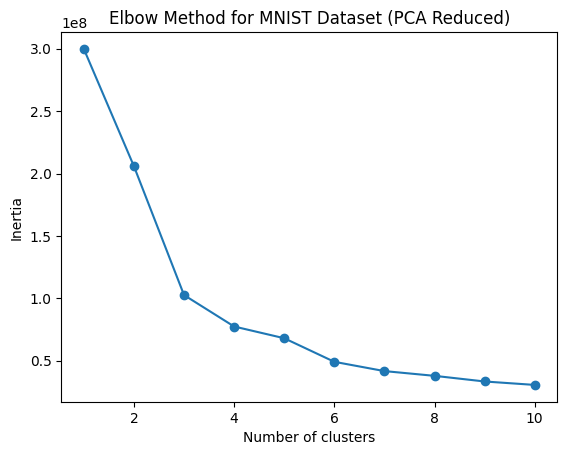

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Load the datasets

# data_2d_path = '/data/data_2d.csv'
# mnist_path = '/data/mnist.csv'
data_2d_path = '/content/data/data_2d.csv'
mnist_path = '/content/data/mnist.csv'

# Reading the csv files
data_2d = pd.read_csv(data_2d_path)
mnist = pd.read_csv(mnist_path)

# Display first few rows of each dataset to understand their structure
data_2d_head = data_2d.head()
mnist_head = mnist.head()

data_2d_head, mnist_head

# Prepare the 2D dataset for clustering
X_2d = data_2d.iloc[:, 1:].values  # Ignoring the first column as it appears to be a label or index

# Function to calculate and plot elbow method
def plot_elbow(X, title):
    inertia = []
    cluster_range = range(1, 11)  # Testing from 1 to 10 clusters
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure()
    plt.plot(cluster_range, inertia, marker='o')
    plt.title(f'Elbow Method for {title}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

# Plotting elbow method for 2D dataset
plot_elbow(X_2d, '2D Dataset')

# Now, applying the same method for the MNIST dataset, after reducing dimensionality with PCA
X_mnist = mnist.iloc[:, 1:].values  # Ignoring the first column (labels)

# Reduce MNIST to 2 dimensions using PCA for visualization and clustering
pca = PCA(n_components=2)
X_mnist_2d = pca.fit_transform(X_mnist)

# Plotting elbow method for MNIST dataset after PCA
plot_elbow(X_mnist_2d, 'MNIST Dataset (PCA Reduced)')
